## AI_Lv8_CA2_v8

**CCT College Dublin**  
**Bachelor of Science Honours in Computing in Information Technology**  
**Introduction to Artificial Intelligence - Y4M1**  
**Year 4, Semester 7**  
**Continuous Assessment 2**

**Lecturer name:** David McQuaid  
**Lecturer email:** dmcquaid@cct.ie

**Student Name:** Mateus Fonseca Campos  
**Student Number:** 2023327  
**Student Email:** 2023327@student.cct.ie

**Submission date:** 19 November 2023
___

### Contents

- [**Questions**](#Questions)
    - [Question 1](#Question-1)
    - [Question 2](#Question-2)
- [**References**](#References)

### Questions

#### Question 1

A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

| <img src="./img/fig_1.png" width=500 /> |
| :-: |
| *Fig. 1* |

<br>

&emsp;&emsp;(a) The graph in Fig. 1 is a visualisation of the problem.  
&emsp;&emsp;&emsp;&emsp;(i) Identify the differences between a graph and a tree. [0-5]

&emsp;&emsp;&emsp;&emsp;(ii) Explain in detail how the graph is an abstraction of the problem. [0-5]

&emsp;&emsp;&emsp;&emsp;(iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]

&emsp;&emsp;(b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]

#### Question 2

The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. [0-60]

In [1]:
from pymxgraph import MGX

In [2]:
mgx = MGX()
mgx.parse('./img/obj/graph.xml')
mgx.render('./img/obj/graph.svg', 0, graph=mgx.graph)

In [3]:
len(mgx.frames)

1

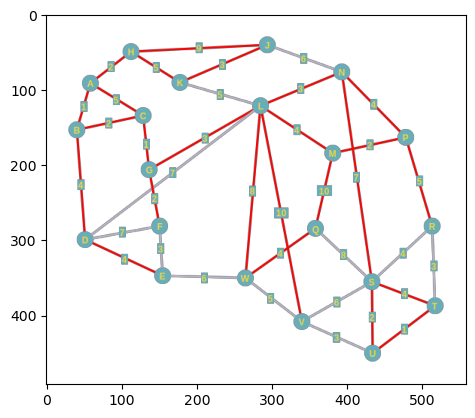

In [15]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

# img1 = Image.open("./img/obj/Angra.jpg")
# img2 = Image.open("./img/obj/Platypus.png")
# img3 = Image.open("./img/obj/Rebirth.jpg")
# np_img1 = np.array(img1)
# np_img2 = np.array(img2)
# np_img3 = np.array(img3)

# ims = [[ax.imshow(np_img1, animated=True)], 
#        [ax.imshow(np_img2, animated=True)],
#        [ax.imshow(np_img3, animated=True)]]

ims = [[ax.imshow(frame, animated=True)] for frame in mgx.frames]

ani = animation.ArtistAnimation(fig, ims, interval=250, blit=True,
                                repeat_delay=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())

# plt.show()

# ani.save("./img/obj/movie.mp4")

# plt.imshow(mgx.frames[0], interpolation='nearest')

In [14]:
# plt.imshow(mgx.frames[2])

# mgx.frames[0].all() == mgx.frames[2].all()

In [6]:
import re

def color(path, i):
    inv_aux = {mgx.graph[vertex]['value']: vertex for vertex in mgx.vertices}
    
#     if i > 0:
#         return
    
    for p in path:
        target = p
        source = path[p]
        
        if source == None or target == None:
            continue
        
        try:
            v = list(filter(lambda x: mgx.graph[x]['source'] == inv_aux[source] and mgx.graph[x]['target'] == inv_aux[target], mgx.edges))[0]
        except:
            v = list(filter(lambda x: mgx.graph[x]['source'] == inv_aux[target] and mgx.graph[x]['target'] == inv_aux[source], mgx.edges))[0]
#         print(v)
        if len(v) != 0:
            mgx.graph[v]['style'] = re.sub(r'strokeColor=[^;]*;', 'strokeColor=#ff0000;', mgx.graph[v]['style'])
    
        print(f"Iter: {i}")
        print(f"Source: {source}")
        print(f"Target: {target}")
        print(f"Edge: {v}")
    
    mgx.render('./img/obj/graph.svg', i, graph=mgx.graph)
#     print("here")

#     tree.write('./img/obj/new_graph.xml')

In [7]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    previous = {vertex: None for vertex in graph}
    distances[starting_vertex] = 0

    i = 0
    
    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_vertex
                
                color(previous, i)
                i += 1
                
                heapq.heappush(pq, (distance, neighbor))

#     color(previous)
    return distances, previous

In [8]:
calculate_distances(mgx.adj_list, 'A')

Iter: 0
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 1
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 1
Source: A
Target: B
Edge: E5iAvGmA8DPn0xUXzhqk-38
Iter: 2
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 2
Source: A
Target: B
Edge: E5iAvGmA8DPn0xUXzhqk-38
Iter: 2
Source: A
Target: C
Edge: E5iAvGmA8DPn0xUXzhqk-39
Iter: 3
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 3
Source: A
Target: B
Edge: E5iAvGmA8DPn0xUXzhqk-38
Iter: 3
Source: B
Target: D
Edge: E5iAvGmA8DPn0xUXzhqk-37
Iter: 3
Source: A
Target: C
Edge: E5iAvGmA8DPn0xUXzhqk-39
Iter: 4
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 4
Source: A
Target: B
Edge: E5iAvGmA8DPn0xUXzhqk-38
Iter: 4
Source: B
Target: D
Edge: E5iAvGmA8DPn0xUXzhqk-37
Iter: 4
Source: B
Target: C
Edge: E5iAvGmA8DPn0xUXzhqk-40
Iter: 5
Source: A
Target: H
Edge: E5iAvGmA8DPn0xUXzhqk-25
Iter: 5
Source: A
Target: B
Edge: E5iAvGmA8DPn0xUXzhqk-38
Iter: 5
Source: B
Target: D
Edge: E5iAvGmA8DPn0xUXzhqk-37
Iter: 5
Source

({'A': 0,
  'H': 2,
  'B': 1,
  'D': 5,
  'E': 9,
  'W': 15,
  'V': 17,
  'U': 19,
  'T': 20,
  'R': 18,
  'P': 13,
  'N': 10,
  'J': 10,
  'C': 3,
  'K': 7,
  'L': 7,
  'G': 4,
  'F': 6,
  'M': 11,
  'Q': 19,
  'S': 17},
 {'A': None,
  'H': 'A',
  'B': 'A',
  'D': 'B',
  'E': 'D',
  'W': 'L',
  'V': 'L',
  'U': 'S',
  'T': 'U',
  'R': 'P',
  'P': 'M',
  'N': 'L',
  'J': 'K',
  'C': 'B',
  'K': 'H',
  'L': 'G',
  'G': 'C',
  'F': 'G',
  'M': 'L',
  'Q': 'W',
  'S': 'N'})

In [9]:
# print(calculate_distances(example_graph, 'X'))
# d, p = calculate_distances(example_graph, 'X')

# t = ['Z']
# while True:
#     t.append(p[t[-1]])
#     if t[-1] == 'X':
#         break
        
# ' -> '.join(reversed(t))

# print(calculate_distances(exercise_graph, 'C'))
d, p = calculate_distances(mgx.adj_list, 'A')

t = ['S']
while True:
    t.append(p[t[-1]])
    if t[-1] == 'A':
        break

t.reverse()
it = iter(t[1:])
out = ''
for v in t:
    if v == t[-1]:
        out += v
        break
    out += f"{v} --({mgx.adj_list[v][next(it)]})--> "

print(f'Distances: {d}\n')
print(f'Previous: {p}\n')
print(f'Path: {out}')

Iter: 0
Source: A
Target: H
Iter: 1
Source: A
Target: H
Iter: 1
Source: A
Target: B
Iter: 2
Source: A
Target: H
Iter: 2
Source: A
Target: B
Iter: 2
Source: A
Target: C
Iter: 3
Source: A
Target: H
Iter: 3
Source: A
Target: B
Iter: 3
Source: B
Target: D
Iter: 3
Source: A
Target: C
Iter: 4
Source: A
Target: H
Iter: 4
Source: A
Target: B
Iter: 4
Source: B
Target: D
Iter: 4
Source: B
Target: C
Iter: 5
Source: A
Target: H
Iter: 5
Source: A
Target: B
Iter: 5
Source: B
Target: D
Iter: 5
Source: H
Target: J
Iter: 5
Source: B
Target: C
Iter: 6
Source: A
Target: H
Iter: 6
Source: A
Target: B
Iter: 6
Source: B
Target: D
Iter: 6
Source: H
Target: J
Iter: 6
Source: B
Target: C
Iter: 6
Source: H
Target: K
Iter: 7
Source: A
Target: H
Iter: 7
Source: A
Target: B
Iter: 7
Source: B
Target: D
Iter: 7
Source: H
Target: J
Iter: 7
Source: B
Target: C
Iter: 7
Source: H
Target: K
Iter: 7
Source: C
Target: G
Iter: 8
Source: A
Target: H
Iter: 8
Source: A
Target: B
Iter: 8
Source: B
Target: D
Iter: 8
Source: H
Ta

### References

Author, A. (Year). *title*. Publisher. Available at: url (Accessed: D Month YYYY).